In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [26]:
data = pd.read_csv("uber.csv") 
data.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [28]:
data["pickup_datetime"] = pd.to_datetime(data["pickup_datetime"])

In [29]:
missing_values = data.isnull().sum()
print("Missing values in the dataset:")
print(missing_values)

Missing values in the dataset:
Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64


In [10]:
data.dropna(inplace=True)

In [11]:
missing_values = data.isnull().sum()
print("Missing values after handling:")
print(missing_values)


Missing values after handling:
Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64


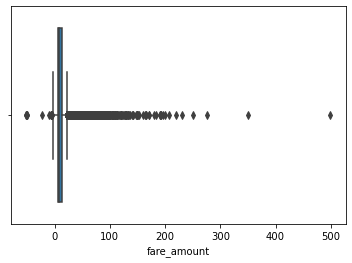

In [12]:
# 2. Identify outliers
# visualization to detect outliers.
sns.boxplot(x=data["fare_amount"])
plt.show()

In [13]:
# Calculate the IQR for the 'fare_amount' column
Q1 = data["fare_amount"].quantile(0.25)
Q3 = data["fare_amount"].quantile(0.75)
IQR = Q3 - Q1

threshold = 1.5
lower_bound = Q1 - threshold * IQR
upper_bound = Q3 + threshold * IQR

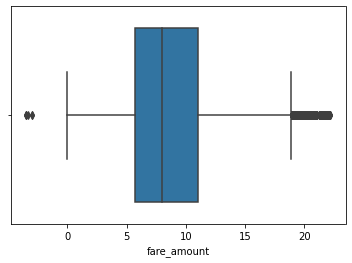

In [14]:
# Remove outliers
data_no_outliers = data[(data["fare_amount"] >= lower_bound) & (data["fare_amount"] <= upper_bound)]

sns.boxplot(x=data_no_outliers["fare_amount"])
plt.show()


Unnamed: 0              AxesSubplot(0.125,0.787927;0.352273x0.0920732)
fare_amount          AxesSubplot(0.547727,0.787927;0.352273x0.0920732)
pickup_longitude        AxesSubplot(0.125,0.677439;0.352273x0.0920732)
pickup_latitude      AxesSubplot(0.547727,0.677439;0.352273x0.0920732)
dropoff_longitude       AxesSubplot(0.125,0.566951;0.352273x0.0920732)
dropoff_latitude     AxesSubplot(0.547727,0.566951;0.352273x0.0920732)
passenger_count         AxesSubplot(0.125,0.456463;0.352273x0.0920732)
dtype: object

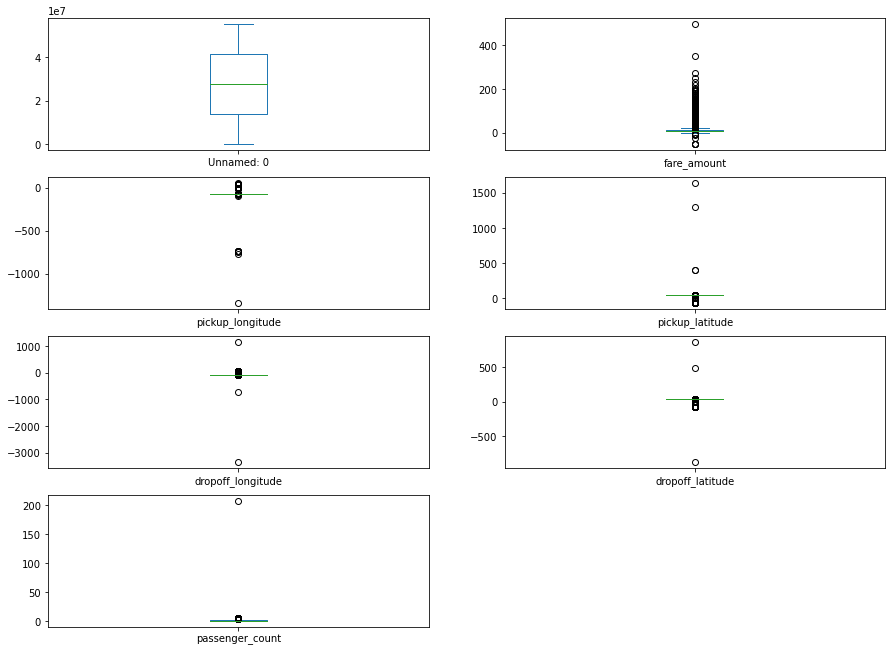

In [15]:

data.plot(kind="box",subplots=True, layout=(7, 2), figsize=(15, 20))

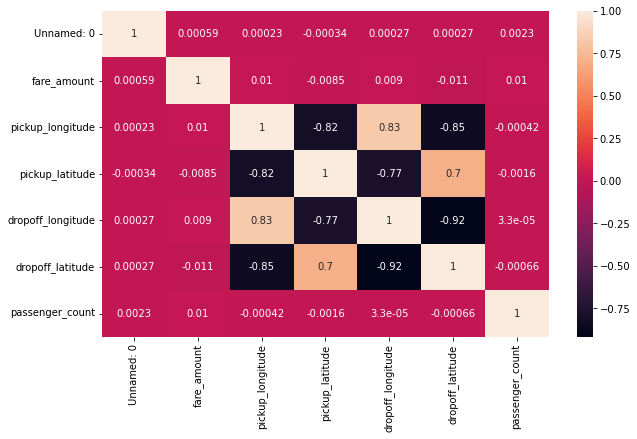

In [19]:

# 3. Check the correlation
# Determine the correlation between features and the target variable (fare_amount).
fig, axis = plt.subplots(figsize=(10,6))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()


In [20]:

# 4. Implement linear regression and random forest regression models
# Split the data into features and target variable
X = data[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']]
y = data['fare_amount']  #Target

In [21]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [24]:

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
# 5. Evaluate the models
# Predict the values
y_pred_lr = lr_model.predict(X_test)
y_pred_lr
print("Linear Model:",y_pred_lr)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Model:", y_pred_rf)

In [ ]:
# Calculate R-squared (R2) and Root Mean Squared Error (RMSE) for both models
r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))# Compare the scores
MAE = mean_absolute_error(y_test,y_pred_lr)
print("Linear Regression - R2:", r2_lr)
print("Linear Regression - RMSE:", rmse_lr)
print("MAE: ",MAE)

In [ ]:

r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print("Random Forest Regression R2:", r2_rf)
print("Random Forest Regression RMSE:",rmse_rf)